### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
# Get information on the dataset
data.info()

#get count of null values in each column
data.isna().sum()
columns_to_check = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in columns_to_check:
   print(f"Unique values for {col}: {data[col].unique()}\n")
   print(f" value counts {data[col].value_counts()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#0 remove duplicates
data_dedup = data.drop_duplicates()

#Observabtion
#1 very high missing values in car, close to 99%, dropping the column as this data is not usable
data_dedup.drop(columns='car', inplace=True)

#2 Check other columns
data_dedup.info()
data_dedup.isna().sum()

#2 Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50	have some missing values, lets see what these are
columns_to_check = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in columns_to_check:
   print(f"Unique values for {col}: {data[col].unique()}\n")
   print(f" value counts {data[col].value_counts()}")

#3 replace the missing values with never
cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Fill missing values with 'never' for each column
for col in cols_to_fill:
    data_dedup[col] = data_dedup[col].fillna('never')



freq_mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

for col in cols_to_fill:
    data_dedup[col + '_Num'] = data_dedup[col].map(freq_mapping)

#final check
data_dedup.info()
data_dedup.isna().sum()




<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null  obj

<ipython-input-10-5673933efc79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedup.drop(columns='car', inplace=True)
<ipython-input-10-5673933efc79>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedup[col] = data_dedup[col].fillna('never')
<ipython-input-10-5673933efc79>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [11]:
data_dedup
accepted_proportion = data['Y'].mean()
print(f"Proportion of users who accepted the coupon: {accepted_proportion:.2%}")

Proportion of users who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

<ipython-input-12-319f4f885883>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_dedup, x='coupon', order=data_dedup['coupon'].value_counts().index, palette='pastel')


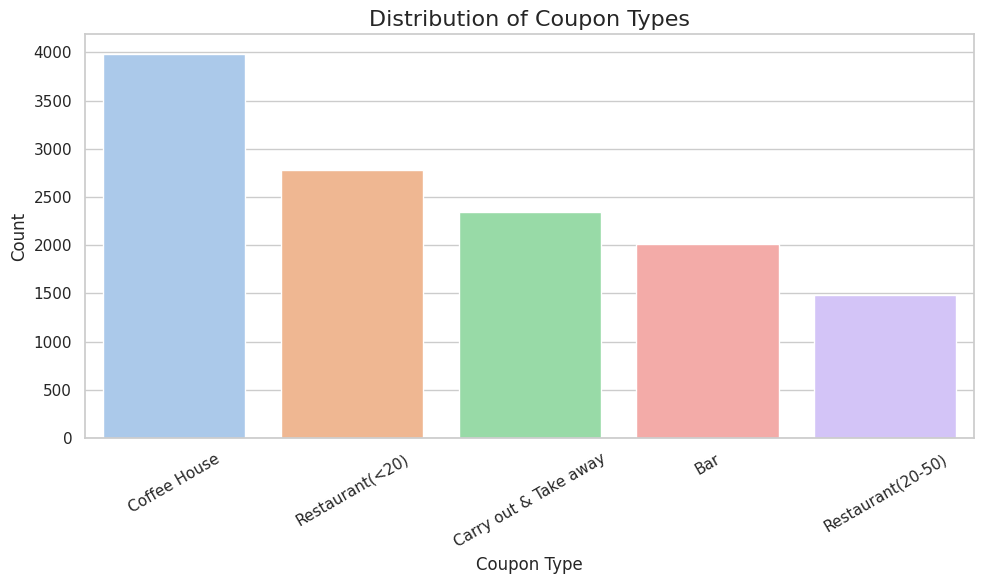

In [12]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_dedup, x='coupon', order=data_dedup['coupon'].value_counts().index, palette='pastel')

# Add titles and labels
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

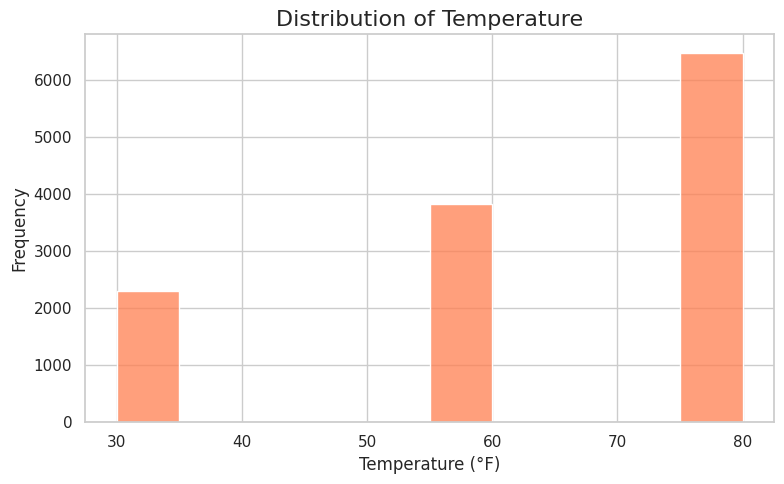

In [13]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=data_dedup, x='temperature', bins=10, kde=False, color='coral')

# Add titles and labels
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bar_data = data_dedup[data_dedup['coupon'] == 'Bar'].copy()

# Preview the new DataFrame
bar_data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Num,CoffeeHouse_Num,CarryAway_Num,RestaurantLessThan20_Num,Restaurant20To50_Num
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1,0,0,1,0,0.0,0.0,0.0,6.0,2.0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,0,1,0,1,0.0,0.0,0.0,6.0,2.0
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1,1,0,1,0,0.0,0.0,0.0,6.0,2.0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,0,0,1,1,0.0,0.5,6.0,6.0,0.5
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,0,1,0,1,0.0,0.5,6.0,6.0,0.5


2. What proportion of bar coupons were accepted?


In [15]:
# Calculate proportion of accepted bar coupons
bar_acceptance_rate = bar_data['Y'].mean()

# Display as a percentage
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")


Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
# Split into low and high bar-goers
low_freq = bar_data[bar_data['Bar_Num'] <= 3]
high_freq = bar_data[bar_data['Bar_Num'] > 3]

# Calculate acceptance rates
low_accept_rate = low_freq['Y'].mean()
high_accept_rate = high_freq['Y'].mean()

# Print results
print(f"Acceptance rate (≤ 3 bar visits/month): {low_accept_rate:.2%}")
print(f"Acceptance rate (> 3 bar visits/month): {high_accept_rate:.2%}")


Acceptance rate (≤ 3 bar visits/month): 37.05%
Acceptance rate (> 3 bar visits/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
bar_data
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}

bar_data['age_num'] = bar_data['age'].map(age_mapping)
# Filter drivers who go to a bar more than once a month and are older than 25
bar_and_older_25 = bar_data[(bar_data['Bar_Num'] > 1) & (bar_data['age_num'] > 25)]

# Filter for all other drivers
other_drivers = bar_data[~((bar_data['Bar_Num'] > 1) & (bar_data['age_num'] > 25))]

# Calculate acceptance rates for both groups
bar_and_older_25_accept_rate = bar_and_older_25['Y'].mean()
other_drivers_accept_rate = other_drivers['Y'].mean()

# Print results
print(f"Acceptance rate (bar goers > 1/month & age > 25): {bar_and_older_25_accept_rate:.2%}")
print(f"Acceptance rate (all others): {other_drivers_accept_rate:.2%}")


Acceptance rate (bar goers > 1/month & age > 25): 69.52%
Acceptance rate (all others): 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [25]:
# Filter for drivers who go to bars more than once a month, have non-kid passengers, and occupations not related to farming, fishing, or forestry.
exclude_occupations = ['farming', 'fishing', 'forestry']

bar_passenger_occupation = bar_data[(bar_data['Bar_Num'] > 1) &
                                    (bar_data['passanger'] != 'kid(s)') &
                                    (~bar_data['occupation'].isin(exclude_occupations))]

# Filter the rest of the drivers (those who don't meet the above conditions)
other_drivers_occupation = bar_data[~((bar_data['Bar_Num'] > 1) &
                                      (bar_data['passanger'] != 'kid(s)') &
                                      (~bar_data['occupation'].isin(exclude_occupations)))]



# Calculate acceptance rates for both groups
bar_passenger_occupation_accept_rate = bar_passenger_occupation['Y'].mean()
other_drivers_occupation_accept_rate = other_drivers_occupation['Y'].mean()

# Print the results
print(f"Acceptance rate (bar >1/month, non-kid passanger, non-farming occupation): {bar_passenger_occupation_accept_rate:.2%}")
print(f"Acceptance rate (all others): {other_drivers_occupation_accept_rate:.2%}")


Acceptance rate (bar >1/month, non-kid passanger, non-farming occupation): 68.79%
Acceptance rate (all others): 29.28%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [26]:
# Group 3: Go to cheap restaurants more than 4 times a month and income is less than 50K (including '$37500 - $49999')
group_3 = bar_data[(bar_data['RestaurantLessThan20_Num'] > 4) &
                   (bar_data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]


# Group 1: Go to bars more than once a month, passengers not kids, not widowed
group_1 = bar_data[(bar_data['Bar_Num'] > 1) &
                   (bar_data['passanger'] != 'kid(s)') &
                   (bar_data['maritalStatus'] != 'widowed')]

# Group 2: Go to bars more than once a month and are under the age of 30
group_2 = bar_data[(bar_data['Bar_Num'] > 1) & (bar_data['age_num'] < 30)]

# Group 3: Go to cheap restaurants more than 4 times a month and income is less than 50K (including '$37500 - $49999')
group_3 = bar_data[(bar_data['RestaurantLessThan20_Num'] > 4) &
                   (bar_data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]

# Calculate the acceptance rates for each group
group_1_accept_rate = group_1['Y'].mean()
group_2_accept_rate = group_2['Y'].mean()
group_3_accept_rate = group_3['Y'].mean()

# Print the results
print(f"Acceptance rate (Group 1 - Bar > 1/month, non-kid passenger, not widowed): {group_1_accept_rate:.2%}")
print(f"Acceptance rate (Group 2 - Bar > 1/month, age < 30): {group_2_accept_rate:.2%}")
print(f"Acceptance rate (Group 3 - Cheap Restaurant > 4/month, income < 50K): {group_3_accept_rate:.2%}")



Acceptance rate (Group 1 - Bar > 1/month, non-kid passenger, not widowed): 68.79%
Acceptance rate (Group 2 - Bar > 1/month, age < 30): 72.17%
Acceptance rate (Group 3 - Cheap Restaurant > 4/month, income < 50K): 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who are younger, socially active, and frequent leisure spots like bars are significantly more likely to accept bar coupons.

Frequency Matters

Drivers who go to bars more than once a month are much more likely to accept bar coupons (e.g., 76.88% vs. 37.05%).

Age Influence

Those under 30 years old and frequenting bars have an even higher acceptance rate (~72.17%), suggesting youthful social habits correlate with receptiveness to bar promotions.

Social Context

Drivers with non-kid passengers and not widowed (likely more socially active or mobile) show higher acceptance (~68.79%), indicating companionship and lifestyle play a role.

Occupation and Income

Blue-collar exclusions (like farming/fishing/forestry) and lower-income restaurant-goers (Group 3) show moderate acceptance (~45.35%), suggesting economic factors influence but don’t dominate decisions.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Proportion of Restaurant(<20) coupon accepted: 70.78%
Acceptance rate by Age group:
age
21         74.165202
26         73.083779
31         70.880361
36         65.187713
41         70.850202
46         76.027397
50plus     63.775510
below21    73.437500
Name: Y, dtype: float64

Acceptance rate by Gender:
gender
Female    69.774011
Male      71.826853
Name: Y, dtype: float64

Acceptance rate by Income group:
income
$100000 or More     72.192513
$12500 - $24999     68.500000
$25000 - $37499     75.336323
$37500 - $49999     68.181818
$50000 - $62499     78.248588
$62500 - $74999     69.680851
$75000 - $87499     66.145833
$87500 - $99999     57.868020
Less than $12500    72.413793
Name: Y, dtype: float64

Acceptance rate by passanger type:
passanger
Alone        63.916084
Friend(s)    80.145278
Kid(s)       72.284644
Partner      77.343750
Name: Y, dtype: float64

Acceptance rate by Weather:
weather
Rainy    39.520958
Snowy    48.800000
Sunny    76.799285
Name: Y, dtype: float64


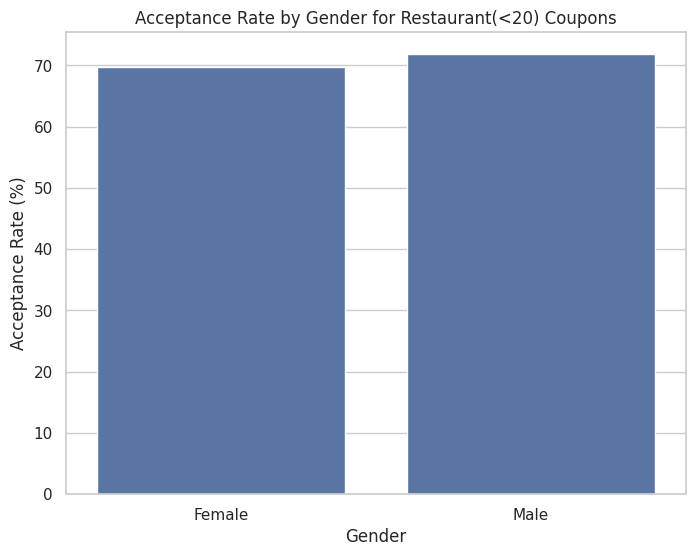

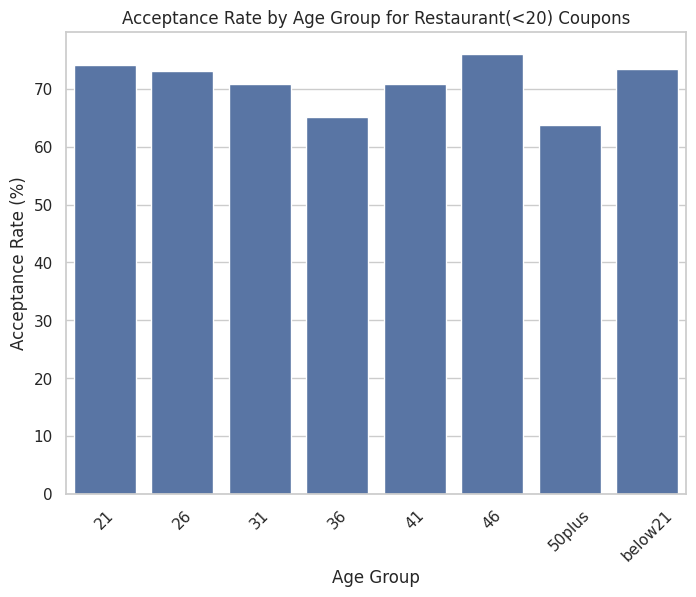

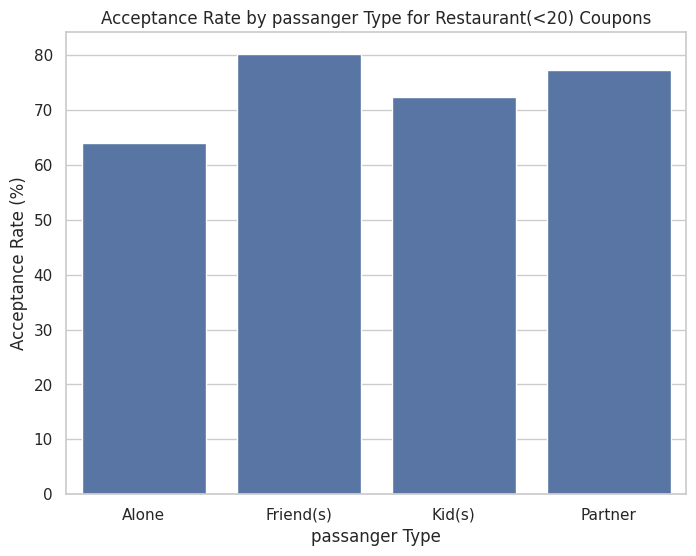

In [27]:
# Filter the dataset to include only those who received a 'Restaurant(<20)' coupon
restaurant_data = data_dedup[data_dedup['coupon'] == 'Restaurant(<20)']


# Proportion of passangers who accepted the Restaurant(<20) coupon
restaurant_acceptance_rate = restaurant_data['Y'].mean() * 100
print(f"Proportion of Restaurant(<20) coupon accepted: {restaurant_acceptance_rate:.2f}%")

# Acceptance rate based on different characteristics
# Age group
age_groups = restaurant_data.groupby('age')['Y'].mean() * 100
print("Acceptance rate by Age group:")
print(age_groups)

# Gender
gender_acceptance_rate = restaurant_data.groupby('gender')['Y'].mean() * 100
print("\nAcceptance rate by Gender:")
print(gender_acceptance_rate)

# Income group
income_groups = restaurant_data.groupby('income')['Y'].mean() * 100
print("\nAcceptance rate by Income group:")
print(income_groups)

# passanger type
passanger_acceptance_rate = restaurant_data.groupby('passanger')['Y'].mean() * 100
print("\nAcceptance rate by passanger type:")
print(passanger_acceptance_rate)

# Weather
weather_acceptance_rate = restaurant_data.groupby('weather')['Y'].mean() * 100
print("\nAcceptance rate by Weather:")
print(weather_acceptance_rate)


import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for acceptance rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_acceptance_rate.index, y=gender_acceptance_rate.values)
plt.title('Acceptance Rate by Gender for Restaurant(<20) Coupons')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate (%)')
plt.show()


# Bar plot for acceptance rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=age_groups.index, y=age_groups.values)
plt.title('Acceptance Rate by Age Group for Restaurant(<20) Coupons')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for acceptance rate by passanger type
plt.figure(figsize=(8, 6))
sns.barplot(x=passanger_acceptance_rate.index, y=passanger_acceptance_rate.values)
plt.title('Acceptance Rate by passanger Type for Restaurant(<20) Coupons')
plt.xlabel('passanger Type')
plt.ylabel('Acceptance Rate (%)')
plt.show()

